# 부동산 가격 크롤링

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
import urllib.request
from bs4 import BeautifulSoup # html 변환에 사용함
import json
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import seaborn as sns

## 법정동 코드

In [106]:
# 법정동코드 불러오기
codes = pd.read_csv('data/부동산/법정동코드.txt', sep = "\t", engine='python', encoding = "cp949")

In [280]:
# 원하는 지역 검색
def search_dong():
    keyword = input('동을 입력하세요 : ')
    return codes['법정동명'][codes['법정동명'].str.contains(keyword)]

## 핫플레이스 구역 별 법정동 지정

In [296]:
#핫플레이스 구역별
hots = pd.read_csv('data/hot_place_list.csv')

In [313]:
hots.columns

Index(['홍대', '연남', '이태원', '종로', '을지로', '성수', '한남', '청담', '신사', '삼청', '서촌',
       '장충', '반포', '혜화', '신촌', '강남'],
      dtype='object')

In [344]:
dong_dict = {'홍대': '서울특별시 마포구 합정동',
             '연남': '서울특별시 마포구 연남동',
             '이태원': '서울특별시 용산구 이태원동',
             '종로': '서울특별시 종로구 익선동',
             '을지로': '서울특별시 중구 인현동2가',
             '성수': '서울특별시 성동구 성수동1가',
             '한남': '서울특별시 용산구 한남동',
             '청담': '서울특별시 강남구 청담동',
             '신사': '서울특별시 강남구 신사동',
             '삼청': '서울특별시 종로구 견지동',
             '서촌': '서울특별시 종로구 청운동',
             '장충': '서울특별시 중구 신당동',
             '반포': '서울특별시 서초구 방배동',
             '혜화': '서울특별시 종로구 명륜2가',
             '신촌': '서울특별시 마포구 노고산동',
             '강남': '서울특별시 강남구 역삼동'}

In [342]:
search_dong()

동을 입력하세요 : 견지


30    서울특별시 종로구 견지동
Name: 법정동명, dtype: object

In [343]:
dong = '서울특별시 종로구 견지동'

sise(dong)

강남 : 서울특별시 종로구 견지동 크롤링 중입니다.


{'dataHeader': {'resultCode': '10000', 'message': 'NO_ERROR'},
 'dataBody': {'data': {'매매시세최소값': 92852,
   '매매거래량최소값': 0,
   '전세시세최대값': 76519,
   '전세거래량최소값': 0,
   '전세거래량최대값': 2,
   '시세': [{'groupCategory': '2016',
     'items': [{'매매평균가': 92852,
       '기준년월': '2016-10',
       '실거래매매건수': 2,
       '전세가율': 59.15,
       '실거래전세건수': 0,
       '전세평균가': 54926},
      {'매매평균가': 92852,
       '기준년월': '2016-11',
       '실거래매매건수': 1,
       '전세가율': 59.15,
       '실거래전세건수': 1,
       '전세평균가': 54926},
      {'매매평균가': 92852,
       '기준년월': '2016-12',
       '실거래매매건수': 1,
       '전세가율': 61.79,
       '실거래전세건수': 1,
       '전세평균가': 57370}]},
    {'groupCategory': '2017',
     'items': [{'매매평균가': 92852,
       '기준년월': '2017-01',
       '실거래매매건수': 0,
       '전세가율': 61.79,
       '실거래전세건수': 2,
       '전세평균가': 57370},
      {'매매평균가': 92852,
       '기준년월': '2017-02',
       '실거래매매건수': 2,
       '전세가율': 67.07,
       '실거래전세건수': 1,
       '전세평균가': 62278},
      {'매매평균가': 92852,
       '기준년월': '2017-03',
 

In [279]:
def sise(dong, period=2):
    '''
    시세 데이터를 크롤링 하는 함수.
    국민은행 리브부동산 이용 : https://kbland.kr/
    dong : 검색하고 싶은 지역의 법정동 명
    period : 기간 설정 (1: 최근 3년간, 2: 최근 5년간, 3: 전체)    
    '''
    code = int(codes['법정동코드'][codes['법정동명'] == dong])
    period = 2  # 최근 3년간 : 1, 최근 5년간 : 2, 전체 : 3
    url = f'https://api.kbland.kr/land-price/price/regionPrice/detailChartList?%EC%A1%B0%ED%9A%8C%EA%B8%B0%EA%B0%84%EA%B5%AC%EB%B6%84={period}&%EB%B2%95%EC%A0%95%EB%8F%99%EC%BD%94%EB%93%9C={code}&%EB%A0%88%EB%B2%A8=15&%EC%8B%9C%EC%84%B8%EC%83%81%ED%83%9C%EA%B5%AC%EB%B6%84=2&webCheck=Y'
    print(f'{place} : {dong} 크롤링 중입니다.')
    response = requests.get(url)
    data = json.loads(response.text)
    
    return data

## 지역별 부동산 가격 크롤링

In [345]:
#dong = '서울특별시 마포구 연남동'
df_total = pd.DataFrame()
for place in dong_dict.keys():
    dong = dong_dict[place]
    data = sise(dong)
    time.sleep(3)
    if 'message' in data['dataBody']:
        df_total[place] = 0
    else: 
        df = pd.DataFrame()
        for i in range(len(data['dataBody']['data']['시세'])):
            df_temp = pd.DataFrame(data['dataBody']['data']['시세'][i]['items'])
            df = pd.concat([df, df_temp])
#         df = df.set_index('기준년월')
#         df_total = pd.concat([df_total, df['매매평균가']], axis=1)
        if df['매매평균가'].isnull().sum() > 0:
            #df.fillna(0)
            df_total[place] = 0
        else:
            df_total[place] = df['매매평균가']
df_total = df_total.set_index(df['기준년월'])

홍대 : 서울특별시 마포구 합정동 크롤링 중입니다.
연남 : 서울특별시 마포구 연남동 크롤링 중입니다.
이태원 : 서울특별시 용산구 이태원동 크롤링 중입니다.
종로 : 서울특별시 종로구 익선동 크롤링 중입니다.
을지로 : 서울특별시 중구 인현동2가 크롤링 중입니다.
성수 : 서울특별시 성동구 성수동1가 크롤링 중입니다.
한남 : 서울특별시 용산구 한남동 크롤링 중입니다.
청담 : 서울특별시 강남구 청담동 크롤링 중입니다.
신사 : 서울특별시 강남구 신사동 크롤링 중입니다.
삼청 : 서울특별시 종로구 견지동 크롤링 중입니다.
서촌 : 서울특별시 종로구 청운동 크롤링 중입니다.
장충 : 서울특별시 중구 신당동 크롤링 중입니다.
반포 : 서울특별시 서초구 방배동 크롤링 중입니다.
혜화 : 서울특별시 종로구 명륜2가 크롤링 중입니다.
신촌 : 서울특별시 마포구 노고산동 크롤링 중입니다.
강남 : 서울특별시 강남구 역삼동 크롤링 중입니다.


In [349]:
df_total

,홍대,연남,이태원,종로,을지로,성수,한남,청담,신사,삼청,서촌,장충,반포,혜화,신촌,강남
기준년월,,,,,,,,,,,,,,,,
2016-10,91727,52040,85095,25014,21140,72493,74731,124518,119801,92852,74917,58462,98194,56115,26819,92676
2016-11,92410,52519,85153,25014,21140,73556,74836,124796,120328,92852,74917,58784,99315,56115,26819,92769
2016-12,92410,52519,85153,25014,21140,73594,74860,126068,120328,92852,74917,58808,99351,56190,26824,93026
2017-01,93839,52519,85207,25665,21140,73635,74878,126336,120328,92852,74917,59248,99735,56190,26824,93552
2017-02,94025,52519,85207,25665,21140,73800,75013,126435,120749,92852,74917,59200,100176,56358,26824,93854
2017-03,95393,54674,85207,25665,21140,74025,71903,126920,121769,92852,74917,59225,101035,57239,26801,94345
2017-04,95579,56003,85672,25665,21140,74789,71903,127872,122069,92852,74917,59277,102085,57253,26801,94847
2017-05,96014,56003,86179,25821,22099,82266,72632,133385,122576,92852,74917,60093,102962,57253,26939,97159
2017-06,96014,56154,88803,25821,22939,87464,73496,134464,122727,92852,74917,61299,103947,58943,26939,98735


# 시각화

In [355]:
#한글폰트
import platform
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


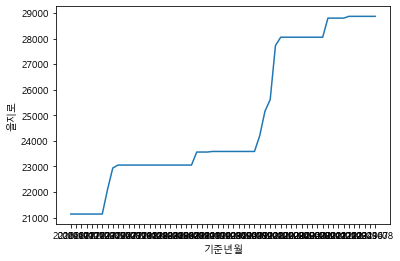

In [403]:
sns.lineplot(x=df_total.index,  y='을지로', data = df_total)
plt.savefig('data/부동산/을지로.png')

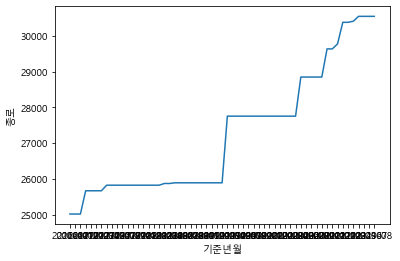

In [401]:
sns.lineplot(x=df_total.index,  y='종로', data = df_total)
plt.savefig('data/부동산/종로.png')

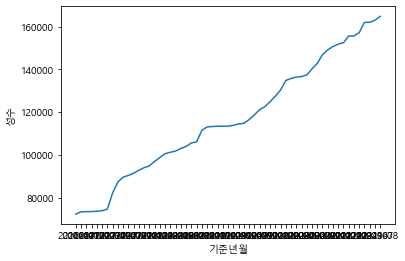

In [402]:
sns.lineplot(x=df_total.index,  y='성수', data = df_total)
plt.savefig('data/부동산/성수.png')

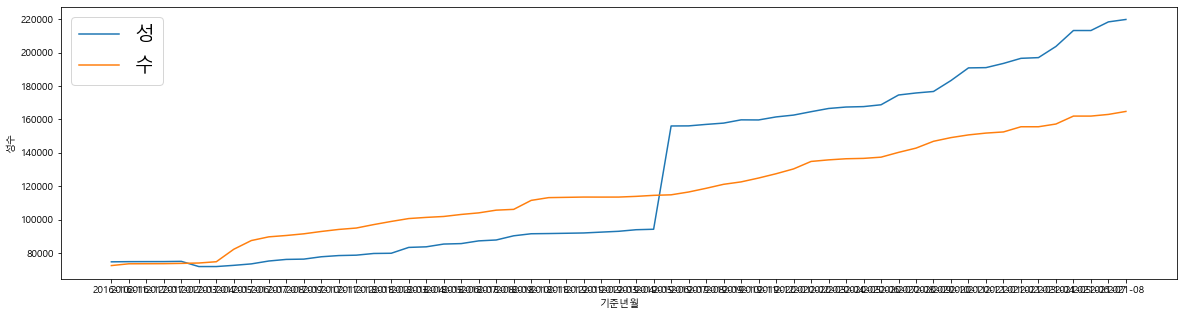

In [372]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df_total.index,  y='한남', data = df_total)
plt.legend('한남', fontsize=20)
sns.lineplot(x=df_total.index,  y='성수', data = df_total)
plt.legend('성수', fontsize=20)

In [351]:
#df_total.to_csv('data/부동산/매매평균가.csv', encoding='utf-8-sig')

In [380]:
df_total

,홍대,연남,이태원,종로,을지로,성수,한남,청담,신사,삼청,서촌,장충,반포,혜화,신촌,강남
기준년월,,,,,,,,,,,,,,,,
2016-10,91727,52040,85095,25014,21140,72493,74731,124518,119801,92852,74917,58462,98194,56115,26819,92676
2016-11,92410,52519,85153,25014,21140,73556,74836,124796,120328,92852,74917,58784,99315,56115,26819,92769
2016-12,92410,52519,85153,25014,21140,73594,74860,126068,120328,92852,74917,58808,99351,56190,26824,93026
2017-01,93839,52519,85207,25665,21140,73635,74878,126336,120328,92852,74917,59248,99735,56190,26824,93552
2017-02,94025,52519,85207,25665,21140,73800,75013,126435,120749,92852,74917,59200,100176,56358,26824,93854
2017-03,95393,54674,85207,25665,21140,74025,71903,126920,121769,92852,74917,59225,101035,57239,26801,94345
2017-04,95579,56003,85672,25665,21140,74789,71903,127872,122069,92852,74917,59277,102085,57253,26801,94847
2017-05,96014,56003,86179,25821,22099,82266,72632,133385,122576,92852,74917,60093,102962,57253,26939,97159
2017-06,96014,56154,88803,25821,22939,87464,73496,134464,122727,92852,74917,61299,103947,58943,26939,98735


## minmax

In [382]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df_total)
output = min_max_scaler.transform(df_total)
df_mm = pd.DataFrame(output, columns=df_total.columns, index=list(df_total.index.values))


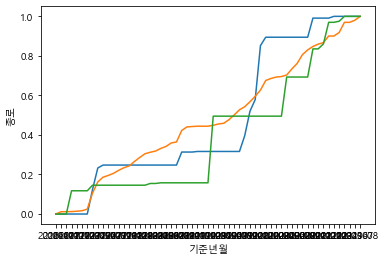

In [404]:
for place in ['을지로', '성수', '종로']:
    sns.lineplot(x=df_total.index,  y=place, data = df_mm)
plt.savefig('data/부동산/min-max.png')

## 시작지점에서 성장률

In [388]:
df_total

,홍대,연남,이태원,종로,을지로,성수,한남,청담,신사,삼청,서촌,장충,반포,혜화,신촌,강남
기준년월,,,,,,,,,,,,,,,,
2016-10,91727,52040,85095,25014,21140,72493,74731,124518,119801,92852,74917,58462,98194,56115,26819,92676
2016-11,92410,52519,85153,25014,21140,73556,74836,124796,120328,92852,74917,58784,99315,56115,26819,92769
2016-12,92410,52519,85153,25014,21140,73594,74860,126068,120328,92852,74917,58808,99351,56190,26824,93026
2017-01,93839,52519,85207,25665,21140,73635,74878,126336,120328,92852,74917,59248,99735,56190,26824,93552
2017-02,94025,52519,85207,25665,21140,73800,75013,126435,120749,92852,74917,59200,100176,56358,26824,93854
2017-03,95393,54674,85207,25665,21140,74025,71903,126920,121769,92852,74917,59225,101035,57239,26801,94345
2017-04,95579,56003,85672,25665,21140,74789,71903,127872,122069,92852,74917,59277,102085,57253,26801,94847
2017-05,96014,56003,86179,25821,22099,82266,72632,133385,122576,92852,74917,60093,102962,57253,26939,97159
2017-06,96014,56154,88803,25821,22939,87464,73496,134464,122727,92852,74917,61299,103947,58943,26939,98735


In [395]:
df_rate = df_total / df_total.loc['2016-10']

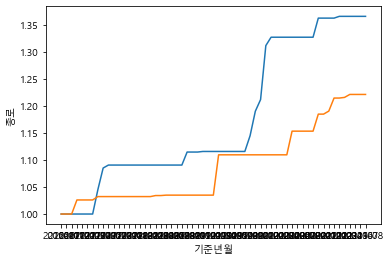

In [406]:
for place in ['을지로', '종로']:
    sns.lineplot(x=df_total.index,  y=place, data = df_rate)
#plt.savefig('data/부동산/rate.png')